In [49]:
import numpy as np
import pandas as pd
from sklearn.datasets import load_iris
from sklearn.impute import SimpleImputer, MissingIndicator
from sklearn.model_selection import train_test_split
from sklearn.pipeline import FeatureUnion, make_pipeline
from sklearn.tree import DecisionTreeClassifier
from sklearn.impute import KNNImputer

X = pd.read_csv( 'protein.csv' ) 
X = X.drop(['ID'], axis=1)
imputer = KNNImputer(n_neighbors=3) #k-nearest neighbors impute, 
X = imputer.fit_transform(X)

In [50]:
X=pd.DataFrame(X)
#from sklearn.preprocessing import StandardScaler
#scaler = StandardScaler()
#X= scaler.fit_transform(X)
#X=pd.DataFrame(X)
X

,0,1,2,3,4,5,6,7,8,9
0,-1.006417,0.882125,1.714778,-2.587934,1.715879,1.720692,-0.465769,1.135213,0.750321,0.627582
1,0.772735,-0.961301,1.639747,-2.108846,0.199883,0.568140,1.321528,-0.006901,-2.473787,-0.646808
2,-1.052577,-0.104960,1.550213,-2.576606,2.083175,2.015090,0.093019,0.959435,-0.263591,0.535906
3,-1.528830,2.176346,-0.214969,-2.021768,-2.962145,-3.295177,2.116420,-1.467550,0.579121,-1.434760
4,-1.407823,-1.028772,0.810723,4.052628,-1.700813,1.399962,2.256554,-0.818456,-1.529480,0.754909
...,...,...,...,...,...,...,...,...,...,...
489,-0.851538,-0.479357,2.271710,-1.820070,0.818096,0.141208,1.537069,0.314096,-0.341870,-1.010343
490,-1.610268,-0.184169,-0.100731,1.991430,-3.139705,4.407357,-0.010682,-1.208989,0.655864,1.034267
491,0.548784,-1.226596,1.755970,-3.334780,0.163496,1.993281,0.039038,1.018653,-1.410111,-0.662079
492,0.152008,-1.686879,1.489334,0.834950,-4.749197,-2.084045,-0.782886,-0.129883,0.496630,-1.550106


Drop all rows with z-wcore over 3

In [64]:
from scipy import stats
z = pd.DataFrame(stats.zscore(X, axis=1, ddof=1))
indexNames = z[  (np.abs(z[0])>2.5) | (np.abs(z[1])>2.5) | (np.abs(z[2])>2.5) | (np.abs(z[3])>2.5) | (np.abs(z[4]) >2.5) | (np.abs(z[5])>2.5) | (np.abs(z[6])>2.5) | (np.abs(z[7])>2.5) | (np.abs(z[8])>2.5) | (np.abs(z[9])>2.5) ].index 
indexNames

Int64Index([ 17,  19,  59,  61,  63,  64,  68,  71,  75,  91,  92,  98, 112,
            124, 135, 136, 152, 153, 155, 158, 165, 173, 179, 196, 200, 204,
            205, 207, 208, 211, 213, 214, 224, 233, 235, 243, 250, 265, 273,
            279, 280, 286, 294, 304, 305, 315, 322, 326, 335, 345, 347, 352,
            357, 364, 369, 371, 383, 384, 387, 390, 399, 407, 408, 410, 411,
            418, 422, 443, 457, 465, 477, 482, 484, 485, 493],
           dtype='int64')

No need to remove any instances

In [65]:
X = X.drop(indexNames )
X

,0,1,2,3,4,5,6,7,8,9
0,-1.006417,0.882125,1.714778,-2.587934,1.715879,1.720692,-0.465769,1.135213,0.750321,0.627582
1,0.772735,-0.961301,1.639747,-2.108846,0.199883,0.568140,1.321528,-0.006901,-2.473787,-0.646808
2,-1.052577,-0.104960,1.550213,-2.576606,2.083175,2.015090,0.093019,0.959435,-0.263591,0.535906
3,-1.528830,2.176346,-0.214969,-2.021768,-2.962145,-3.295177,2.116420,-1.467550,0.579121,-1.434760
4,-1.407823,-1.028772,0.810723,4.052628,-1.700813,1.399962,2.256554,-0.818456,-1.529480,0.754909
...,...,...,...,...,...,...,...,...,...,...
488,1.308182,-0.743505,0.483344,-5.582024,0.200337,-2.903750,0.085492,-1.746900,0.910038,2.292125
489,-0.851538,-0.479357,2.271710,-1.820070,0.818096,0.141208,1.537069,0.314096,-0.341870,-1.010343
490,-1.610268,-0.184169,-0.100731,1.991430,-3.139705,4.407357,-0.010682,-1.208989,0.655864,1.034267
491,0.548784,-1.226596,1.755970,-3.334780,0.163496,1.993281,0.039038,1.018653,-1.410111,-0.662079


In [66]:
import numpy as np
import matplotlib.pyplot as plt

# Fixing random state for reproducibility
np.random.seed(19680801)

x = np.array(X[1])
y = np.array(X[2])


def scatter_hist(x, y, ax, ax_histx, ax_histy):
    # no labels
    ax_histx.tick_params(axis="x", labelbottom=False)
    ax_histy.tick_params(axis="y", labelleft=False)

    # the scatter plot:
    ax.scatter(x, y)

    # now determine nice limits by hand:
    binwidth = 0.25
    xymax = max(np.max(np.abs(x)), np.max(np.abs(y)))
    lim = (int(xymax/binwidth) + 1) * binwidth

    bins = np.arange(-lim, lim + binwidth, binwidth)
    ax_histx.hist(x, bins=bins)
    ax_histy.hist(y, bins=bins, orientation='horizontal')

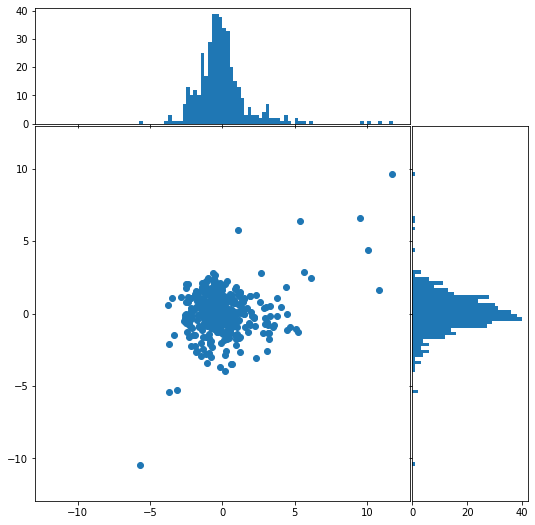

In [67]:
# definitions for the axes
left, width = 0.1, 0.65
bottom, height = 0.1, 0.65
spacing = 0.005


rect_scatter = [left, bottom, width, height]
rect_histx = [left, bottom + height + spacing, width, 0.2]
rect_histy = [left + width + spacing, bottom, 0.2, height]

# start with a square Figure
fig = plt.figure(figsize=(8, 8))

ax = fig.add_axes(rect_scatter)
ax_histx = fig.add_axes(rect_histx, sharex=ax)
ax_histy = fig.add_axes(rect_histy, sharey=ax)

# use the previously defined function
scatter_hist(x, y, ax, ax_histx, ax_histy)

plt.show()

In [123]:
from sklearn.mixture import GaussianMixture

gm = GaussianMixture(n_components=5,  covariance_type='diag', tol=0.001, reg_covar=1e-06, max_iter=100, n_init=1, init_params='kmeans', weights_init=None, means_init=None, precisions_init=None, random_state=None, warm_start=False, verbose=0, verbose_interval=10)

gm = gm.fit(X)

gm.means_

array([[ 0.1630227 , -0.33980539,  0.45952536, -2.56548226,  1.02821721,
         1.57834445, -0.22218825,  0.76718674, -0.320691  , -0.36385673],
       [-0.41946644, -0.11826285, -0.12782215,  2.19417016,  3.55855347,
        -1.2318105 , -0.34102416, -0.74605072,  0.51977044, -0.44825724],
       [ 0.22810269, -0.41059005, -0.21998782,  4.15427971, -1.39716382,
        -0.97285609,  0.3310418 ,  0.84912984, -1.0692474 ,  0.59242282],
       [ 0.58020112,  0.40089211,  0.0198489 ,  1.98975663, -2.39294666,
         3.4695167 ,  0.23736942, -0.86941695,  0.67694543,  0.32109831],
       [-0.43270345,  0.6586651 ,  0.08677332, -2.76247564, -1.66457974,
        -2.04406403,  0.19698105, -0.26575893,  0.81810035,  0.20380503]])

Visualize using principal component analysis
3 dim

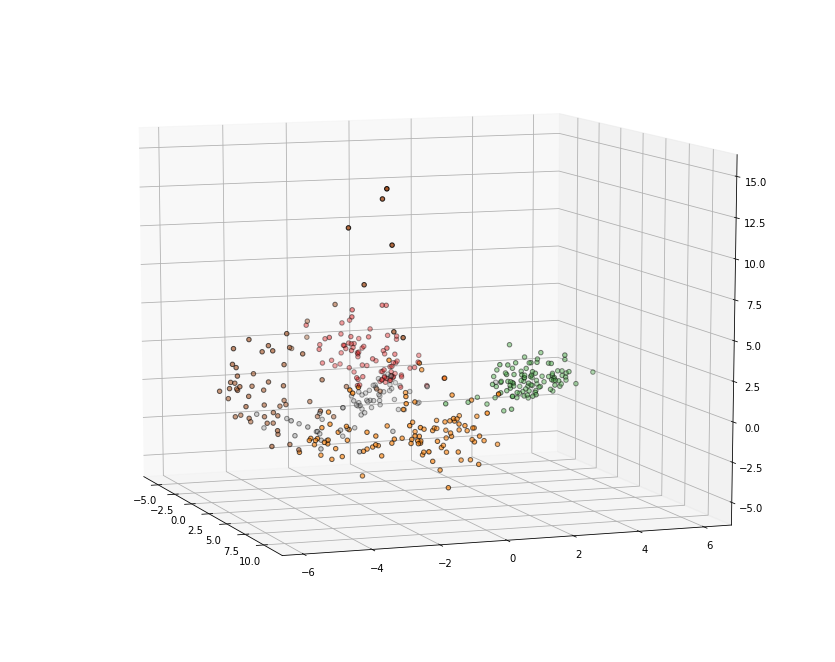

In [124]:
import numpy as np
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D

from sklearn import decomposition

np.random.seed(5)

fig = plt.figure(1, figsize=(12, 9))
plt.clf()
ax = Axes3D(fig, rect=[0, 0, .95, 1], elev=10, azim=-20)

y = gm.predict(X) #labels

pca = decomposition.PCA(n_components=3)
X_new = pca.fit_transform(X)

ax.scatter(X_new[:, 0], X_new[:, 1], X_new[:, 2], c=y,cmap=plt.cm.get_cmap('Set1', 5),
           edgecolor='k')



plt.show()

2 dim PCA

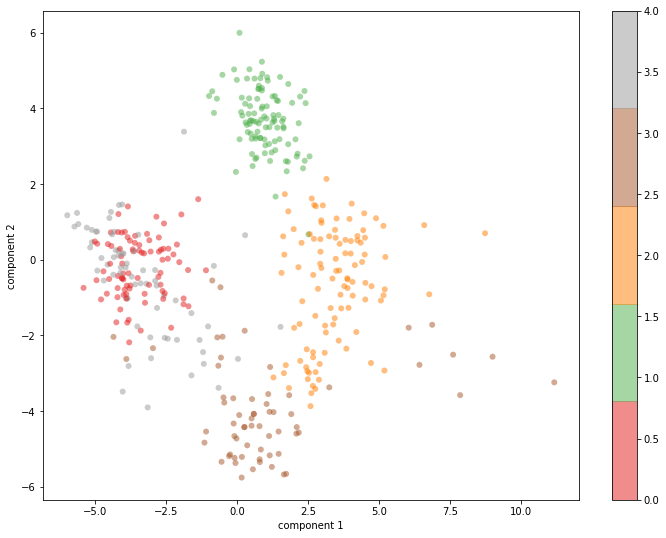

In [125]:
import numpy as np
import matplotlib.pyplot as plt

from sklearn import decomposition

np.random.seed(5)

fig = plt.figure(1, figsize=(12, 9))

y = gm.predict(X) #labels

pca = decomposition.PCA(n_components=2)
X_2 = pca.fit_transform(X)
plt.scatter(X_2[:, 0], X_2[:, 1],
            c=y, edgecolor='none', alpha=0.5,
            cmap=plt.cm.get_cmap('Set1', 5))
plt.xlabel('component 1')
plt.ylabel('component 2')
plt.colorbar();

In [126]:
y

array([0, 0, 0, 4, 2, 1, 1, 0, 2, 3, 2, 4, 4, 0, 1, 1, 0, 2, 4, 0, 2, 4,
       2, 1, 0, 1, 4, 3, 3, 3, 0, 1, 3, 2, 4, 4, 0, 1, 1, 3, 0, 2, 2, 2,
       1, 4, 4, 1, 2, 3, 0, 4, 4, 2, 2, 1, 1, 0, 1, 0, 2, 0, 4, 2, 1, 0,
       2, 0, 0, 0, 3, 2, 1, 4, 1, 2, 2, 1, 0, 2, 2, 2, 2, 2, 2, 3, 1, 1,
       0, 0, 1, 0, 2, 3, 2, 1, 1, 3, 2, 4, 1, 0, 0, 3, 1, 3, 4, 2, 4, 1,
       1, 4, 2, 0, 1, 0, 3, 1, 0, 3, 4, 2, 2, 1, 4, 4, 2, 2, 4, 1, 0, 3,
       2, 2, 3, 3, 3, 2, 3, 3, 0, 4, 4, 1, 4, 1, 2, 3, 4, 0, 1, 4, 2, 0,
       2, 3, 2, 1, 2, 1, 2, 1, 1, 0, 4, 2, 2, 1, 0, 4, 0, 4, 1, 2, 2, 1,
       1, 3, 2, 4, 4, 4, 0, 0, 1, 1, 4, 0, 1, 2, 1, 4, 2, 1, 3, 3, 4, 4,
       2, 2, 1, 1, 1, 1, 0, 2, 2, 3, 3, 4, 4, 3, 0, 0, 1, 0, 2, 2, 1, 4,
       0, 3, 1, 0, 1, 1, 0, 0, 3, 3, 3, 2, 3, 2, 0, 0, 0, 4, 2, 3, 1, 1,
       4, 2, 1, 1, 4, 2, 2, 2, 1, 0, 0, 3, 1, 4, 4, 2, 4, 2, 2, 0, 1, 2,
       1, 2, 0, 3, 0, 2, 0, 1, 2, 2, 1, 2, 4, 0, 1, 1, 2, 1, 4, 2, 0, 3,
       1, 2, 2, 3, 0, 1, 0, 3, 2, 3, 4, 4, 1, 3, 3,

In [127]:
gm.score(X)

-17.490235150788422

Check best number of components is actually 5 as required and figure out best covariance_type argument using BIC score

In [128]:
lowest_bic = np.infty
bic = []
n_components_range = range(4, 7)
cv_types = ['spherical', 'tied', 'diag', 'full']
for cv_type in cv_types:
    for n_components in n_components_range:
        # Fit a Gaussian mixture with EM
        gmm = GaussianMixture(n_components=n_components,
                                      covariance_type=cv_type)
        gmm.fit(X)
        bic.append(gmm.bic(X))
        if bic[-1] < lowest_bic:
            lowest_bic = bic[-1]
            best_gmm = gmm

In [129]:
best_gmm.get_params

<bound method BaseEstimator.get_params of GaussianMixture(covariance_type='full', init_params='kmeans', max_iter=100,
                means_init=None, n_components=6, n_init=1, precisions_init=None,
                random_state=None, reg_covar=1e-06, tol=0.001, verbose=0,
                verbose_interval=10, warm_start=False, weights_init=None)>

In [130]:
df = pd.DataFrame(gm.means_) #centriods
df

,0,1,2,3,4,5,6,7,8,9
0,0.163023,-0.339805,0.459525,-2.565482,1.028217,1.578344,-0.222188,0.767187,-0.320691,-0.363857
1,-0.419466,-0.118263,-0.127822,2.194170,3.558553,-1.231811,-0.341024,-0.746051,0.519770,-0.448257
2,0.228103,-0.410590,-0.219988,4.154280,-1.397164,-0.972856,0.331042,0.849130,-1.069247,0.592423
3,0.580201,0.400892,0.019849,1.989757,-2.392947,3.469517,0.237369,-0.869417,0.676945,0.321098
4,-0.432703,0.658665,0.086773,-2.762476,-1.664580,-2.044064,0.196981,-0.265759,0.818100,0.203805


In [131]:
gm.lower_bound_ #lower bond on likelihood

-17.490659439566212

In [132]:
gm.covariances_

array([[ 1.64538764,  0.9181113 ,  2.10105767,  1.09810681,  0.81264684,
         2.35393917,  1.40862188,  0.48182097,  1.88090133,  0.57948838],
       [ 0.76142868,  0.22743323,  0.60378021,  0.51719904,  0.75060774,
         0.52115276,  0.45034402,  0.34499114,  0.3968904 ,  0.37362744],
       [ 2.08891539,  2.75295908,  1.79174612,  0.98663106,  1.25372935,
         2.3310517 ,  6.98684412,  2.95298553,  3.39634441,  0.53703514],
       [14.8479895 ,  9.78542864,  5.13970267,  4.32784503,  1.63548842,
         4.15980532,  2.31601494,  0.9279807 ,  2.39889201,  0.81230891],
       [ 2.88074084,  5.49510573,  3.14320819,  2.60791469,  2.79507342,
         1.10414248,  3.17896952,  1.60325488,  2.85158284,  3.75308661]])

In [133]:
gm.weights_ #P(y_i)

array([0.20045788, 0.24274236, 0.23574454, 0.15880742, 0.1622478 ])

similarity within virus mutations

In [17]:
#similarity within virus mutation

Spectral Clustering
Apply clustering to a projection of the normalized Laplacian.

In practice Spectral Clustering is very useful when the structure of the individual clusters is highly non-convex or more generally when a measure of the center and spread of the cluster is not a suitable description of the complete cluster. For instance when clusters are nested circles on the 2D plane.

In [ ]:
from sklearn.cluster import SpectralClustering
import numpy as np

clustering = SpectralClustering(n_clusters=5,
        assign_labels="discretize",
        random_state=0).fit(X)

clustering

SpectralClustering(affinity='rbf', assign_labels='discretize', coef0=1,
                   degree=3, eigen_solver=None, eigen_tol=0.0, gamma=1.0,
                   kernel_params=None, n_clusters=5, n_components=None,
                   n_init=10, n_jobs=None, n_neighbors=10, random_state=0)

visualize using principal component analysis

plot covariance matrix for each component and calculate determinant of each covariance matrix

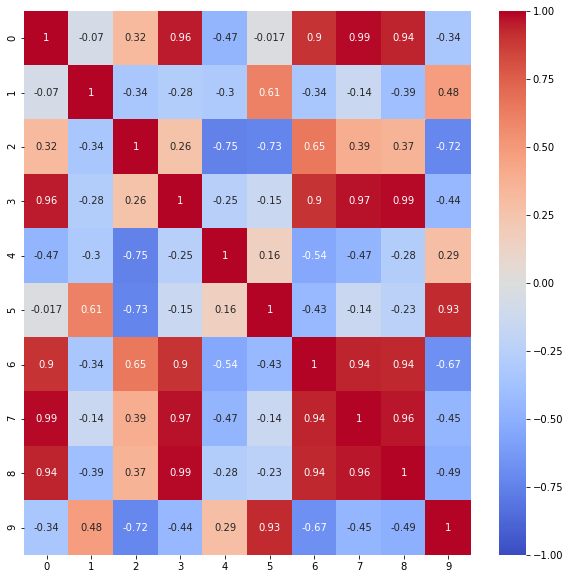

In [22]:
#importing all the libraries needed
import seaborn as sns
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

df_new = pd.DataFrame(gm.covariances_) #covariance matrix with diagonal cv
fig, ax = plt.subplots(figsize=(10,10)) #resize
sns.heatmap(df_new.corr(), annot = True, vmin=-1, vmax=1, center= 0, cmap= 'coolwarm')


Protein 1 is highly correlated with proteins 4,7,8,9.
Protein 3 is highly negatively correlated with proteins  5,6,10.

Determine 5 most important features for descriminating mutation groups:
1.SFS
2.SBS
3.principal component analysis

with scoring function f1 score on test  set